### This file includes
-  DEM interpolation to veg grid
-  DEM plot rotation
-  patch spacing on rotated plot

-  We should write input coordinated from this file.
    - still need correct input

In [2]:
import matplotlib.pylab as plt
import numpy as np
from osgeo import gdal
import osr

# from scipy import misc
# raster = misc.imread('HillslopeOnlyVeg.tif')

In [3]:
%matplotlib inline

In [4]:
# 1. DEM of the hillslope (HillslopeDEM.tif).
ds = gdal.Open("/Users/octavia/deesse/dem files/HillslopeDEM.tif")
dem = np.array(ds.GetRasterBand(1).ReadAsArray())
dem[dem < -1e5] = np.nan
# 2.  A slope inclination layer (Dem_Slope.tif)
ds = gdal.Open("/Users/octavia/deesse/dem files/Dem_Slope.tif")
slope = np.array(ds.GetRasterBand(1).ReadAsArray())
slope[slope< -1] = np.nan


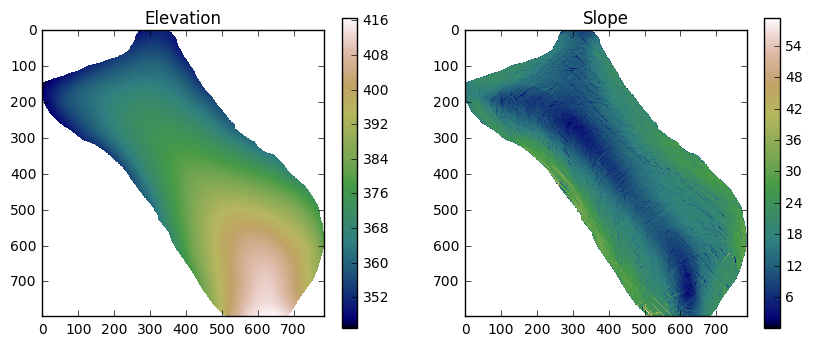

In [5]:
plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.imshow(dem, cmap='gist_earth',interpolation='none')
plt.colorbar()
plt.title('Elevation')

plt.subplot(122)
plt.imshow(slope, cmap='gist_earth',interpolation='none')
plt.colorbar()
plt.title('Slope')

# plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

In [6]:
# interpolate DEM to veg 
from scipy import interpolate
from scipy.interpolate import griddata

# get DEM coords
ds = gdal.Open("/Users/octavia/deesse/dem files/HillslopeDEM.tif")
nrows, ncols = dem.shape
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
x = np.arange(0,  dx*ncols, dx)
y  =  np.arange(0, dy*nrows, dy )
X, Y = np.meshgrid(x, y)

# points = np.vstack((X.ravel(), Y.ravel())).T
# points = points[ ~np.isnan(dem.ravel())]
# dempoints = dem.ravel()[~np.isnan(dem.ravel())]

# slopepoints = slope.ravel()[~np.isnan(slope.ravel())]

In [16]:
# 3. A classification of the high resolution Orthophoto of lehavim. (HillslopeClassification.tif)
ds = gdal.Open("/Users/octavia/deesse/dem files/HillslopeClassification.tif")
ortho = np.array(ds.GetRasterBand(1).ReadAsArray(), dtype = float)
mask = ortho == 255
ortho[ortho == 255] = np.nan


# 4. A layer that has only the vegetation component of the above classification (HillslopeOnlyVeg.tif).
ds = gdal.Open("/Users/octavia/deesse/dem files/HillslopeOnlyVeg.tif")
veg = np.array(ds.GetRasterBand(1).ReadAsArray())

# nrows, ncols = veg.shape
# x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
# xveg = np.arange(0, dx*ncols, dx)
# yveg =  np.arange(0, dy*nrows, dy )
# yveg = np.flipud(yveg)
# Xveg, Yveg = np.meshgrid(xveg, yveg)

# DEM = griddata(points, dempoints, (Xveg, Yveg), method='linear')
# DEM = np.flipud(DEM)

# SLOPE = griddata(points, slopepoints, (Xveg, Yveg), method='linear')
# SLOPE = np.flipud(SLOPE)

# Yveg = np.flipud(Yveg)
# yveg = Yveg[:, 1]


In [17]:
# SLOPE[np.isnan(ortho)== True ] = np.nan
# DEM[np.isnan(ortho)== True ] = np.nan

In [18]:
x[10] - x[9]

0.5

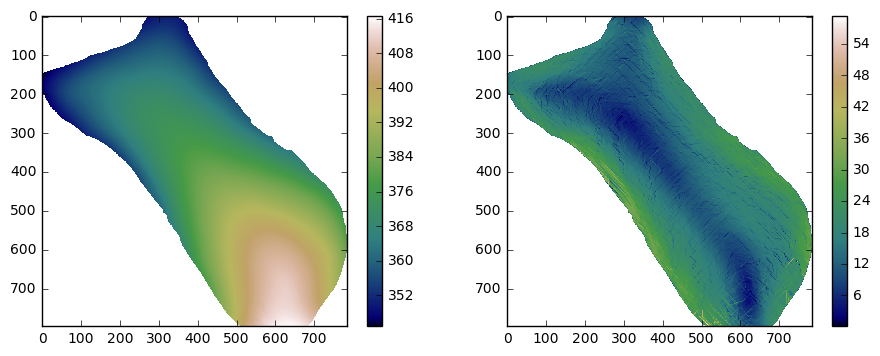

In [19]:
# check interpolation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (11, 4))
plt.subplot(121)
plt.imshow(dem, cmap='gist_earth', interpolation = 'none')
plt.colorbar()
plt.subplot(122)
plt.imshow(slope, cmap='gist_earth', interpolation = 'none')
plt.colorbar()

In [20]:
# check interpolation
# plt.plot(y, dem[:, x == 25], '.', ms = 2)
# plt.plot(yveg, DEM[:, xveg == xveg[xveg > 25][0]], '-')


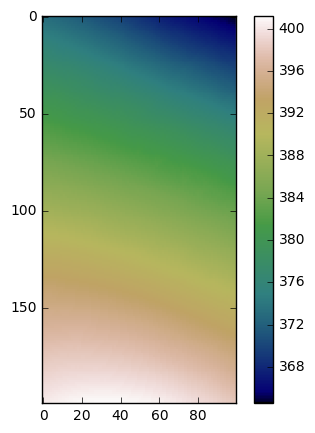

In [109]:
## Define test image

dx = 100
dy = 200
xi = 545; xf = xi + dx
yi = 350; yf = yi + dy

# print SLOPE[yi:yf,xi:xf].mean(), '+/-', SLOPE[yi:yf,xi:xf].var() 
plt.figure(figsize = (10, 5))
ax = plt.subplot(121)
plt.imshow(dem[yi:yf,xi:xf], cmap='gist_earth', interpolation = 'none')
plt.colorbar()

In [110]:
# for i in range(10):
#     for j in range(10):
#         print i, j, DEM[i, j]

In [111]:
# testveg = veg[yi:yf,xi:xf]
testdem = dem[yi:yf,xi:xf]
testslope = slope[yi:yf,xi:xf]

Nx = testdem.shape[1]
Ny = testdem.shape[0]

## Rotation

In [112]:
# nx = 10
# t =  -1*np.meshgrid(np.arange(nx), np.arange(nx))[0] + 5*np.meshgrid(np.arange(nx), np.arange(nx))[1]

198.158540347


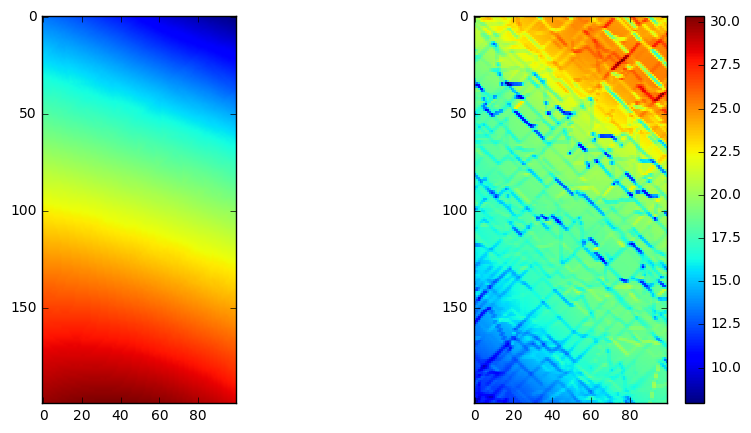

In [113]:
plt.figure(figsize = (10, 5))
ax = plt.subplot(121)
t = dem[yi:yf,xi:xf]
plt.imshow(t, interpolation = None)
# plt.quiver(np.gradient(t)[1], -np.gradient(t)[0])
ax = plt.subplot(122)
plt.imshow(slope[yi:yf,xi:xf], interpolation= 'none')
plt.colorbar()

yy = np.mean(np.gradient(t)[0])
xx = np.mean(np.gradient(t)[1])
r = yy/xx
theta = np.mod(np.arctan(r)*180/np.pi + (1 - np.sign(xx+1e-10))*90, 360) + 90
print theta 

In [114]:
from scipy.ndimage.interpolation import rotate
import numpy.ma as ma

In [82]:
testmask = np.ones(testdem.shape)
Rtestdem  = rotate(testdem,theta,mode = 'nearest')
# Rtestveg  = rotate(testveg,theta,mode = 'nearest')
Rmask = rotate(testmask, theta)
Rmask =np.array(Rmask, dtype = bool)

In [86]:
Rtestdem = ma.array(Rtestdem, mask  = ~Rmask)
# Rtestveg = ma.array(Rtestveg, mask  = ~Rmask)

In [87]:
# import scipy.misc
# scipy.misc.imsave('../FourierWindowMethodMATLAB/hillslope.tiff', testveg)

NameError: name 'ryi' is not defined

In [107]:
ryi = np.where(Rtestdem.mask[:, 0] == False)[0][0]
rxi = np.where(Rtestdem.mask[1, :] == False)[0][0]

In [108]:
Rtestdem[]

92

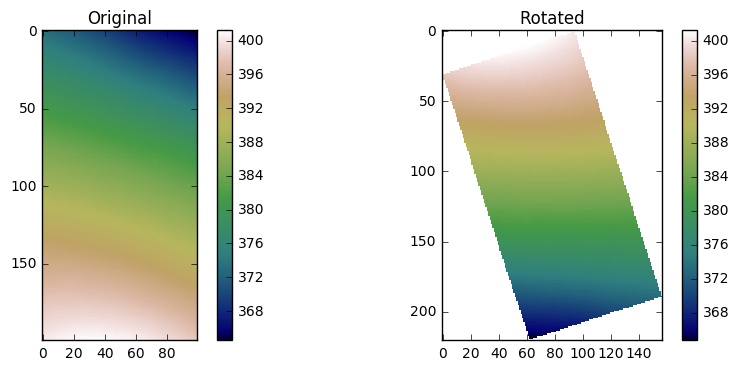

In [95]:

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.imshow(testdem,   cmap='gist_earth', interpolation='none')
plt.colorbar()
plt.title('Original')
plt.subplot(122)
plt.imshow(Rtestdem,
           cmap='gist_earth', interpolation='none')
plt.colorbar()
plt.title('Rotated')

# plt.figure(figsize=(11, 4))
# plt.subplot(121)
# plt.title('Constant y=5')
# plt.plot(testdem[100, :], label = 'original')
# plt.plot(Rtestdem[100, :], '.-', label = 'rotated')
# plt.legend(loc= 'best')
# plt.subplot(122)
# plt.title('Constant x=5')
# plt.plot(testdem[:, 100], label = 'original')
# plt.plot(Rtestdem[:, 100],'.-', label = 'rotated')


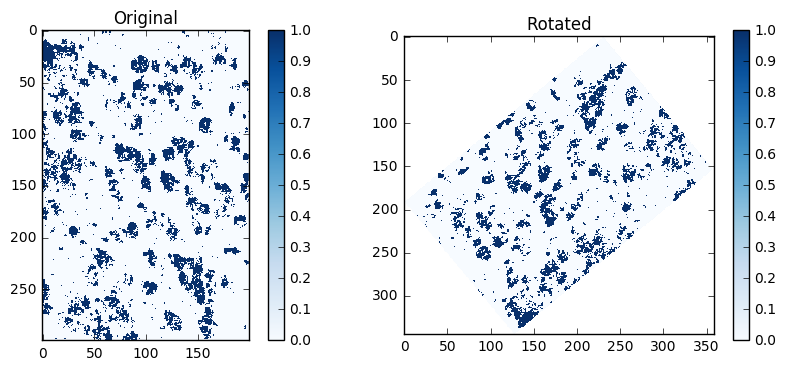

In [81]:

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.imshow(testveg, cmap='Blues', interpolation='none')
plt.colorbar()
plt.title('Original')
plt.subplot(122)
plt.imshow(Rtestveg, cmap='Blues', interpolation='none')
plt.colorbar()
plt.title('Rotated')

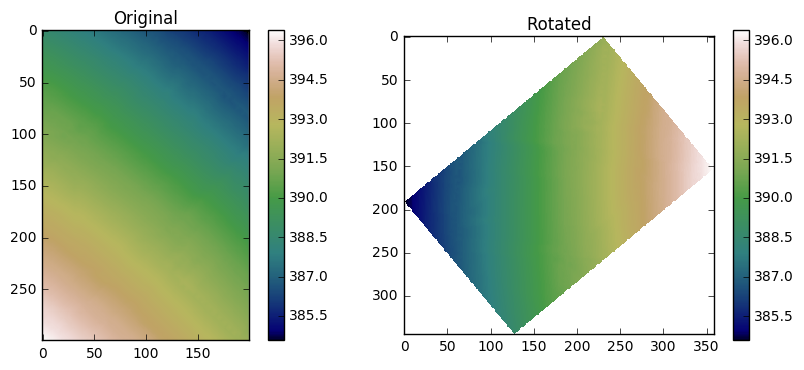

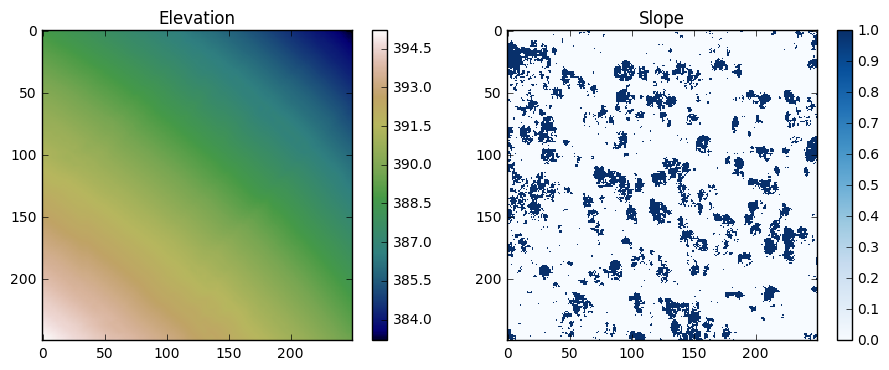

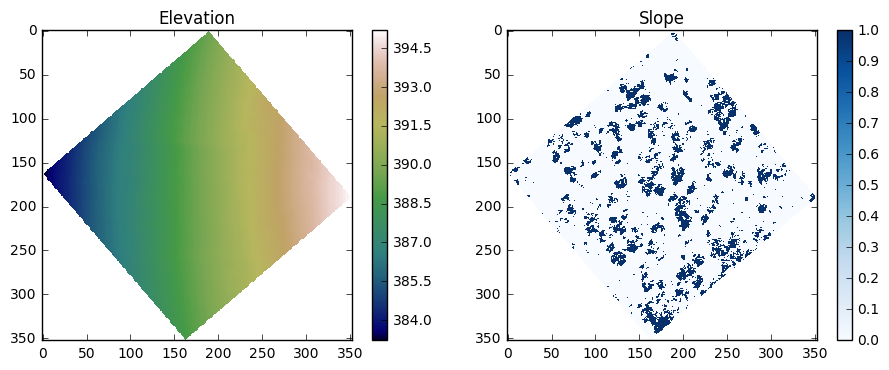

In [26]:
## 
plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(testdem,
           cmap='gist_earth', interpolation='none')
plt.colorbar()
plt.title('Elevation')

plt.subplot(122)
plt.imshow(testveg,
           cmap='Blues',interpolation='none')
plt.colorbar()
plt.title('Slope')


plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(Rtestdem,
           cmap='gist_earth', interpolation='none')
plt.colorbar()
plt.title('Elevation')

plt.subplot(122)
plt.imshow(Rtestveg,
           cmap='Blues',interpolation='none')
plt.colorbar()
plt.title('Slope')


## Patch spacing

In [27]:
Ny = Rtestveg.shape[0]
Nx = Rtestveg.shape[1]
xspaces = []

for i in range(0, Ny):
    count = 0
    for j in range(0, Nx):
        if Rtestveg[i, j] == 0:
            count += 1
        elif Rtestveg[i,j] ==1 and Rtestveg[i, j-1] ==0:
#             print i, j, count
            xspaces.append(count)
            count = 0
xspaces = np.array(xspaces)                    

In [28]:
yspaces = []
for j in range(0, Nx):
    count = 0
    for i in range(0, Ny):
        if Rtestveg[i, j] ==0:
            count += 1
        elif Rtestveg[i, j] == 1 and Rtestveg[i-1, j] ==0:
            yspaces.append(count)
            count = 0
yspaces = np.array(yspaces)            

In [29]:
nbins  = 20  # number of bins
bins= np.logspace(np.log10(2), np.log10(200), nbins)
norm = bins[1:] - bins[:-1]

In [30]:
import powerlaw 
results = powerlaw.Fit(xspaces) 
print results.power_law.alpha 
print results.power_law.xmin 

5.06088480146
50.0


Calculating best minimal value for power law fit
//anaconda/lib/python2.7/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [31]:
# power law exponent for patch size distribution
def get_alpha(fld, xmin):
    n = fld[fld >= 2].shape[0]
    alpha = 1+ n/np.sum(np.log(fld[fld >= xmin]/xmin))
    sigma = (alpha - 1)/np.sqrt(n)
    C = (alpha - 1)*xmin**(alpha - 1)
    return alpha, sigma, C

x_alpha, x_sigma, x_C  = get_alpha(xspaces, 2)
y_alpha, y_sigma, y_C  = get_alpha(yspaces, 2)


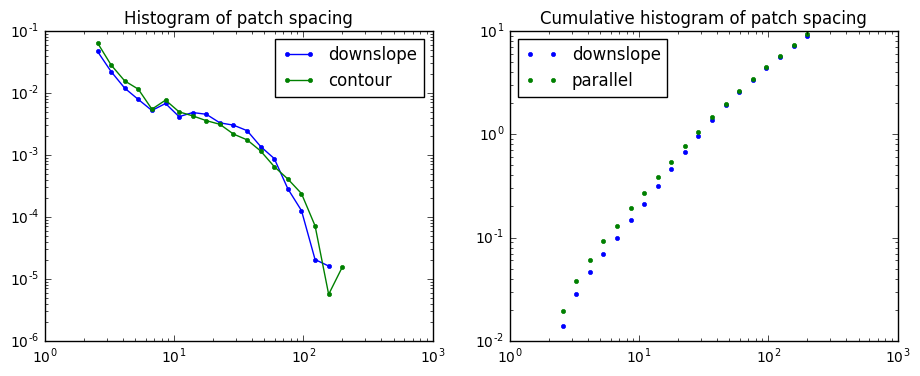

In [28]:
plt.figure(figsize = (11, 4))

plt.subplot(121)
x_counts, _ = plt.histogram(xspaces, bins=bins, normed= True)
plt.loglog(bins[1:], x_counts/norm, '.-', label = 'downslope')
# plt.loglog(bins[1:], x_C*bins[1:]**-alpha)
y_counts, _ = plt.histogram(yspaces, bins=bins, normed= True)
plt.loglog(bins[1:], y_counts/norm, '.-', label = 'contour')
plt.legend(loc = 'best')
plt.title('Histogram of patch spacing')

plt.subplot(122)
plt.loglog(bins[1:], np.cumsum(x_counts)*norm, '.', label = 'downslope')
plt.loglog(bins[1:], np.cumsum(y_counts)*norm, '.', label = 'parallel')
plt.legend(loc = 'best')
plt.title('Cumulative histogram of patch spacing')
# # plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

### Patch size distribution

In [29]:
def get_patches(fld):
    from scipy import ndimage

    # Returns list of patch sizes
    s =  np.ones((3,3)) # iterate structure
    s[0, 0] = 0  # comment out for queen neighbors
    s[2, 0] = 0
    s[2, 2] = 0
    s[0, 2] = 0

    labeled_array, numpatches = ndimage.label(fld,s) # labeling
    sizes = ndimage.sum(fld,labeled_array,range(1,numpatches+1)) 
    return sizes

train_patches = get_patches(testveg)
# sim_patches = get_patches(veg_real00000) 

alpha = 1.68, sigma = 0.04


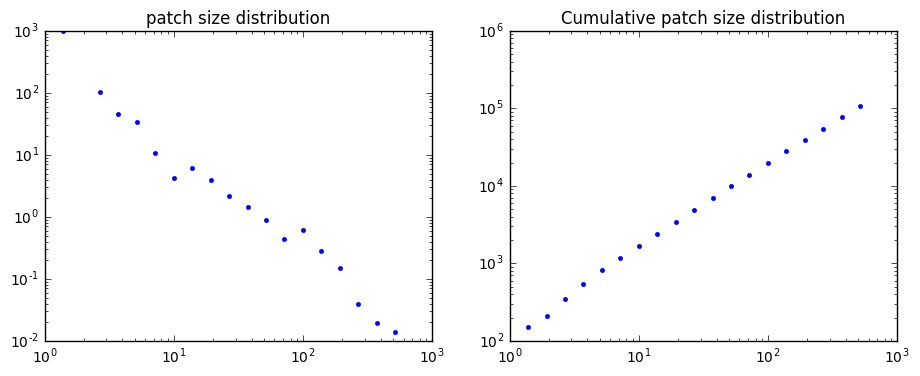

In [30]:
n = train_patches[train_patches >= 2].shape[0]
alpha = 1+ n/np.sum(np.log(train_patches[train_patches >= 2.]/2.))
sigma = (alpha - 1)/np.sqrt(n)
print 'alpha = {0:.2f}, sigma = {1:.2f}'.format(alpha, sigma)

plt.figure(figsize = (11, 4))
plt.subplot(121)
counts, bins = plt.histogram(train_patches, bins=np.logspace(0.0, np.log10(max(train_patches)), 20))
norm  = bins[1:] - bins[:-1]
plt.loglog(bins[1:], counts/norm, '.')
plt.title('patch size distribution')

plt.subplot(122)
test = plt.histogram(train_patches, bins=np.logspace(0.0, np.log10(max(train_patches)), 20))
counts = test[0]
bins = test[1]
norm  = bins[1:] - bins[:-1]
plt.loglog(bins[1:], np.cumsum(counts)*norm, '.')
plt.title('Cumulative patch size distribution')


In [31]:
print 'Training:'
print '  mean patch density = {0:.3f}'.format(np.sum(train_patches)/Nx/Ny)
print '  mean patch size = {0:.1f}'.format(float(np.mean(train_patches)))
print '  alpha = {0:.2f}, sigma = {1:.2f}'.format(alpha, sigma)


Training:
  mean patch density = 0.080
  mean patch size = 13.5
  alpha = 1.68, sigma = 0.04


In [32]:
import powerlaw 
results = powerlaw.Fit(train_patches, xmin = 2) 
print results.power_law.alpha 
print results.power_law.xmin 


1.67839465324
2.0


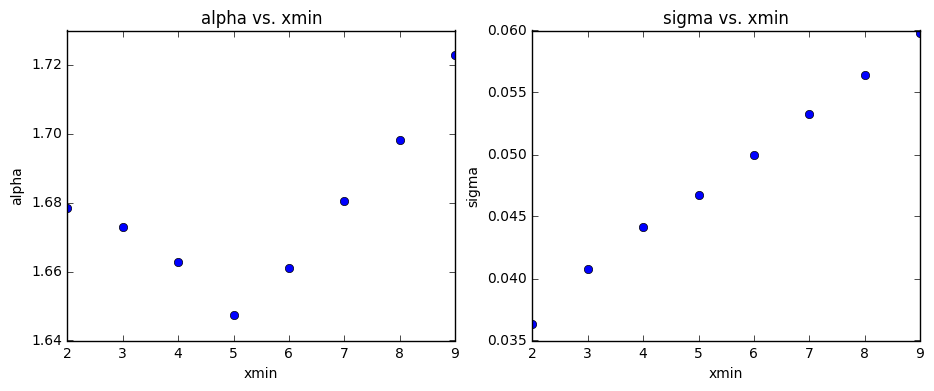

In [33]:
ns = []
alphas = []
sigmas = []
bins = range(2, 10)
for i in bins:
    ns.append(  train_patches[train_patches >= i].shape)
    alphas.append(1+ train_patches[train_patches >= i].shape/np.sum(np.log(train_patches[train_patches >= i]/i)))
    sigmas.append((alphas[i-bins[0]] - 1)/np.sqrt(ns[i-bins[0]]))
    
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(bins, alphas, 'o')
plt.title('alpha vs. xmin'); plt.xlabel('xmin');  plt.ylabel('alpha')
plt.subplot(122)
plt.plot(bins, sigmas, 'o')
plt.title('sigma vs. xmin'); plt.xlabel('xmin');  plt.ylabel('sigma')


## Code for  downslope path

In [ ]:

# neightboring cells
# X = 10
# Y = 10

# neighbors = lambda x, y : [(x2, y2) for x2 in range(x-1, x+2)
#                                 for y2 in range(y-1, y+2)
#                                 if  (x != x2 or y != y2)]
# neighbors(X,Y)

# neighbors = []
# for i in range(-1, 2):
#     for j in range(-1, 2):
#         neighbors.append( (i,j))


# dx = np.meshgrid(np.arange(-1, 2), np.arange(-1,2))[0]
# dy = np.meshgrid(np.arange(-1,2), np.arange(-1,2))[1]
# def step(dy,dx):
#     if  np.abs(dx) >= np.abs(dy):
#         return np.array([0, -np.sign(dx)])
#     elif np.abs(dx) < np.abs(dy):
#         return np.array([- np.sign(dy), 0])
    
# nx = 10
# t =  -1*np.meshgrid(np.arange(nx), np.arange(nx))[0] + 1*np.meshgrid(np.arange(nx), np.arange(nx))[1]

# path = np.zeros([ t.shape[0], t.shape[1],2], dtype = int)
# Dx, Dy = np.gradient(t)
# for i in range(t.shape[0]):
#     for j in range(t.shape[1]):
#         path[ i, j, :] = step(Dx[i, j],Dy[i,j])
        
# for l in range(100):
#     try:
#         iloc = iloc + path[iloc,jloc,0]
#         jloc = jloc + path[iloc,jloc,1]
#         print t[iloc, jloc]
#     except IndexError:
#         break
        
# ds = step(np.gradient(t)[0][1,1],np.gradient(t)[1][1,1])
